
## <center> Store Purchases Analysis And Prediction Using Decision Tree And Random Forest Regressions
#### <center> June 2023 </center>

# 1. Introduction

   Brands allocate budgets for marketing their products and services to their target audience. Marketing team are tasked with developing Marketing strategies to achieve objectives such as building brand awareness, driving
engagement, generating leads, conversions or sales. It is important to measure key performance indicatiors (KPIs) based on set objectives in order to determine the success of a marketing campaign.
In this report, the obtained data "marketing_data.csv" is analysed with the aim of understanding the status of a marketing campaign and proposing data-driven solutions to improve the marketing campaign results.
The marketing data was sourced from [Marketing Analytics by Jennifer Crockett on Kaggle](https://www.kaggle.com/code/jennifercrockett/marketing-analytics-eda-task-final/notebook)

# 2. Methods

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ==========================================================

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

# =============================================================
pd.set_option("display.max_columns", None)
%matplotlib inline
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.set_palette("Blues_r")

# ===============================================================
# Load data
md = pd.read_csv("marketing_data.csv")

# Generate an overview of the marketing dataframe (md)
md.info()
md.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


The dataset contains 2240 observations (i.e customer data), 27 features and the target variable NumWebPurchases.

## 2.1 Data Cleaning
* White spaces were removed from column names
* Selected columns were chnaged to numeric values
* Income variable was chnaged to float datatype

In [2]:
# remove whitespaces from column names
md.columns = md.columns.str.replace(" ", "")

# convert income to float
md["Income"] = md["Income"].str.replace("$", "")
md["Income"] = md["Income"].str.replace(",", "").astype('float')

# view cleaned data
md.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## 2.2 Exploratory Data Analysis

In [3]:
# Check for null values
md.isnull().sum().sort_values(ascending = False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

The feature (Income) has 24 null values. Income was ploted to observe the distribution and to determine the strategy to treat the null values.

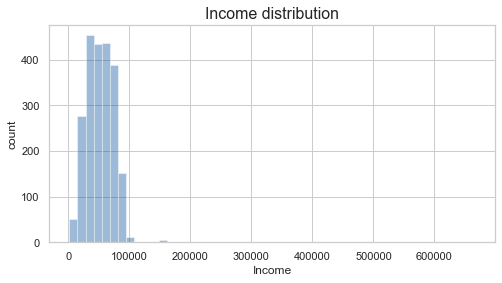

In [4]:
plt.figure(figsize = (8,4))
sns.distplot(md["Income"], kde = False, hist = True)
plt.title("Income distribution", size = 16)
plt.ylabel("count");

<AxesSubplot:>

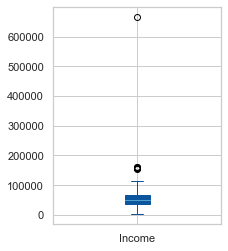

In [5]:
md["Income"].plot(kind = "box", figsize = (3,4), patch_artist=True)

The Income values are observed from 0 to \$100,000 with a few outliers. The null values of the income were replaced with the median Income value to avoid the skewing effects of the mean due to the ouliers present in the data.

In [6]:
# replace null values in Income with the median Income value
md["Income"] = md["Income"].fillna(md["Income"].median())

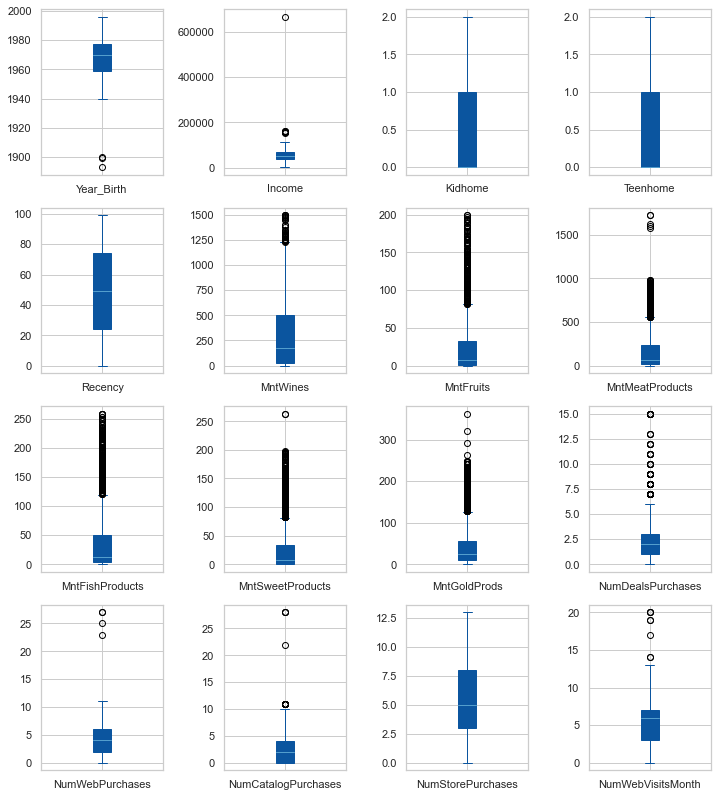

In [7]:
# Identify other features with outliers
# plot selected features 
md_f_plot = md.drop(columns = ["ID", "AcceptedCmp1", "AcceptedCmp2",
                             "AcceptedCmp3", "AcceptedCmp4", 
                              "AcceptedCmp5", "Response", 
                              "Complain"]).select_dtypes(include = np.number)

# subplots
md_f_plot.plot(subplots = True, layout = (4,4), kind = "box",
              figsize=(12,14), patch_artist = True)
plt.subplots_adjust(wspace = 0.5)

plt.savefig("C:/Users/USER/Desktop/UoE/MA336- AI/Final Project/features.png")

Most of the features have outliers. The rows where the outliers of the Year_Birth feature is earlier than 1900 were removed from the data.

<AxesSubplot:>

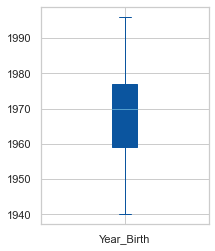

In [8]:
# drop rows with outliers from Year_Birth feature
md = md[md["Year_Birth"] > 1900].reset_index(drop = True)

# to confirm outlier removal
plt.figure(figsize = (3,4))
md["Year_Birth"].plot(kind = "box", patch_artist = True)

In [9]:
# convert Dt_Customer to datetime
md["Dt_Customer"] = pd.to_datetime(md["Dt_Customer"])

In [10]:
# confirm data types
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-nul

New feautures were engineered from the existing features.

- The total number of dependents in the home ("Dependents") was engineered from the sum of "Kidhome" and "Teenhome"
- The year each customer was made (Year_Customer) was engineered from "Dt_Customer".
- The total amount spent ("TotalMnt") was engineered from the sum of all the features names containing "Mnt".
- The total purchases ("TotalPurchases") was engineered from the sum of all the feature names containing "Purchases".
- The total number of campaigns accepted ("TotalCampaignsAcc") was angineered from the sum of all the feature names containing "Cmp" and "Response" (the latest campaign).

In [11]:
print(list(md.columns))

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']


In [12]:
# engineer features
# dependents
md["Dependents"] = md["Kidhome"] + md["Teenhome"]

# year each customer was made
md["Year_Customer"] = pd.DatetimeIndex(md["Dt_Customer"]).year

# total amount spent
mnt_feat = [col for col in md.columns
           if "Mnt" in col]
md["TotalMnt"] = md[mnt_feat].sum(axis = 1)

# total purchases
purchases_feat = [col for col in md.columns
                 if "Purchases" in col]
md["TotalPurchases"] = md[purchases_feat].sum(axis = 1)

# total campaigns accepted
campaigns_feat = [col for col in md.columns
                 if "Cmp" in col] + ["Response"] # Response is the latest campaign
md["TotalCampaignsAcc"] = md[campaigns_feat].sum(axis = 1)

# view the engineered features by customer ID
md[["ID", "Dependents", "Year_Customer", "TotalMnt", "TotalPurchases",
   "TotalCampaignsAcc"]].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


In [13]:
md.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,2014,1190,15,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,2014,577,18,2
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,1,2014,251,11,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,2,2014,11,4,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,1,2014,91,8,2


## Identifying Patterns

The correlation matrix of the features was computed. Since there are some features with binary values, the non-parametric test of correlation (kendall) method was used. The Positive correlations are shown as red, negative correlations are blue and no correlation are shown as grey in the clustered heatmap below.

Data anlaysis source: [Marketing Analytics by Jennifer Crockett on Kaggle](https://www.kaggle.com/code/jennifercrockett/marketing-analytics-eda-task-final/notebook)

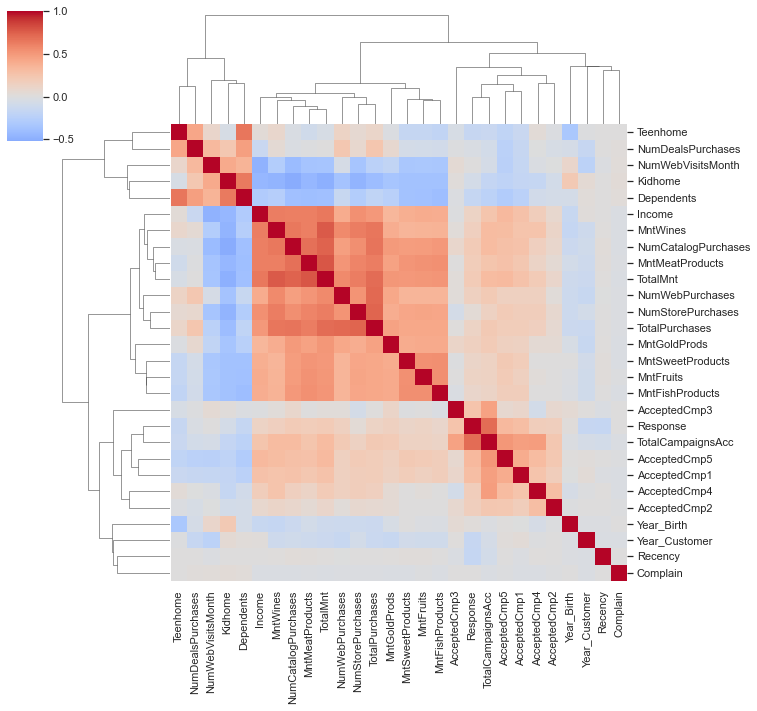

In [14]:
# compute correlation matrix
corrs = md.drop(columns = "ID").select_dtypes(include = np.number).corr(method = "kendall")

# plot correlations using clustered heatmap
sns.clustermap(corrs, cbar_pos = (-0.05, 0.8, 0.05, 0.18), 
               cmap = "coolwarm", center = 0);
plt.savefig("C:/Users/USER/Desktop/UoE/MA336- AI/Final Project/correlationmat.png")

The correlations from the clustered heatmap indicates the following:
1. The Income cluster:
    - The amount spent ("TotalMnt" and other "Mnt" Features) and number of purchases ("TotalPurchases" and other "Num...Purchases" features) are positively correlated with "Income".
    - Purchasing in store, on the web or via the catalog ("NumStorePurchases", "NumWebPurchases", "NumCatalogPurchases") are positively correlated with "Income".


2. The Kid and Teens cluster:
    - The amount spent ("TotalMnt" and other "Mnt" Features) and number of purchases ("TotalPurchases" and other "Num...Purchases" features) are negatively correlated with "Dependents" which is engineered from kids and teens features.
    - The purchasing deals ("NumDealsPurchases") is positively correlated with "Dependents" and negatively correlated with "Income".
    
    
3. The Advertising Campaigns cluster:
    - The acceptance of the advertising campaigns ("AcceptedCmp" and "Response") are strongly positively correlated with each other.
    - A weak positive correlation is observed between the advertising campaigns and income cluster. A weak negative correlation is observed with the "Dependents" (Kids & Teens) cluster.
    
    
4. Unusual observation:
    - There is no correlation between the number of website visits in the last month ("NumWebVisitsMonth") and the number of web purchases ("NumWebPurchases").
    - The "NumWebVisitsMonth" is positiely correlated with the number of deals purchased ("NumDealsPurchases"). This suggests that deals are an effective way of achieving sales conversions on the website.
    
These above points are also observed in the plots below.

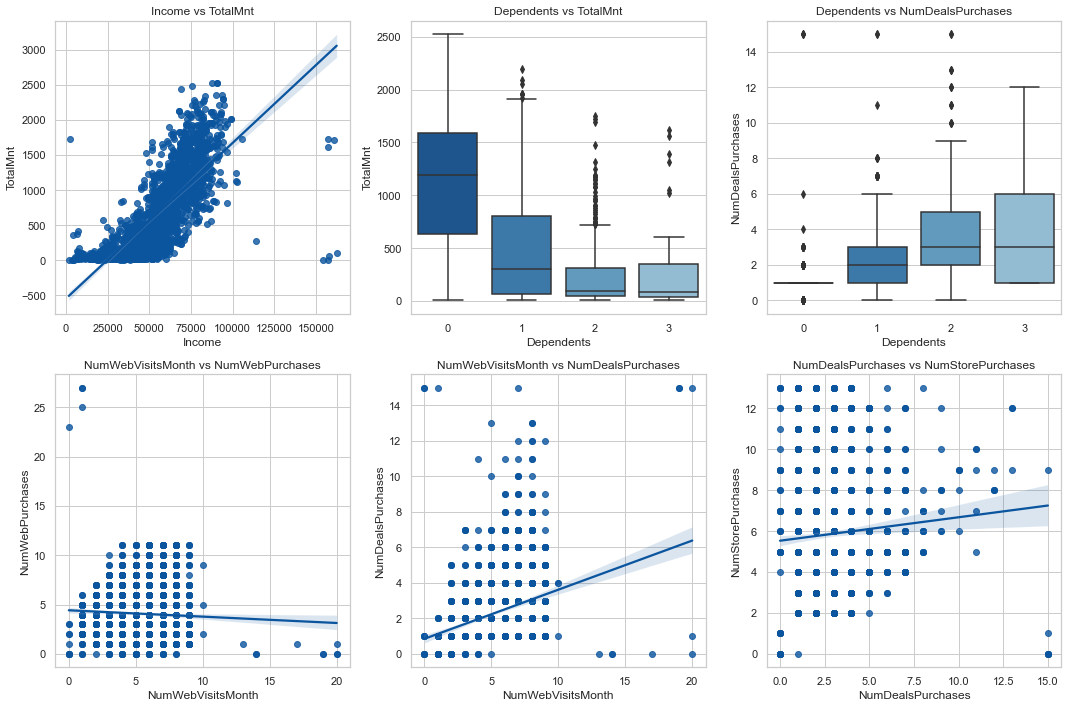

In [15]:
# to visualize the significant factors mentioned
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(15,10))

# Plot 1
# plot to show positive relationship of income on spending
# income limited to <200000 to remove outlier

sns.regplot(x = "Income", y = "TotalMnt", data = md[md["Income"] < 200000], 
           ax = axes[0, 0])
axes[0, 0].set_title("Income vs TotalMnt")

# Plot 2
# Plot to show negative effect of dependents on spending capacity
# plt.figure(figsize = (4,4))
sns.boxplot(x = "Dependents", y = "TotalMnt", data = md, 
           ax = axes[0, 1])
axes[0, 1].set_title("Dependents vs TotalMnt")

# Plot 3
# Plot to show the positive effects of dependents on number of deals purchased
# plt.figure(figsize = (4,4))
sns.boxplot(x = "Dependents", y = "NumDealsPurchases", data = md, 
           ax = axes[0, 2])
axes[0, 2].set_title("Dependents vs NumDealsPurchases")


# Plot 4
# Plot to show no positive correlation between the number of web visits last month and number of web purchases
sns.regplot(x = "NumWebVisitsMonth", y = "NumWebPurchases", data = md, 
           ax = axes[1, 0])
axes[1, 0].set_title("NumWebVisitsMonth vs NumWebPurchases")


# Plot 5
# Plot to show the positive correlation betweeen the number of web visits last month and the number of deals purchased
sns.regplot(x = "NumWebVisitsMonth", y = "NumDealsPurchases", data = md, 
           ax = axes[1, 1])
axes[1, 1].set_title("NumWebVisitsMonth vs NumDealsPurchases")

# Plot 6
# Plot to show the positive correlation betweeen the number of web visits last month and the number of store purchases
sns.regplot(x = "NumDealsPurchases", y = "NumStorePurchases", data = md, 
           ax = axes[1, 2])
axes[1, 2].set_title("NumDealsPurchases vs NumStorePurchases")

# Set spacing between subplots
plt.tight_layout()

# show plot
plt.show()

## 2.3 Statistical Analysis

The distribution of the response or target variable, number of store purchases ("NumStorePurchases") was observed.

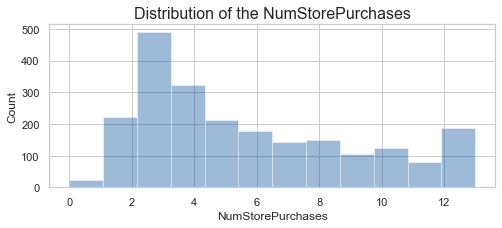

In [16]:
plt.figure(figsize = (8,3))
sns.distplot(md["NumStorePurchases"], kde = False, hist = True, bins = 12)
plt.title("Distribution of the NumStorePurchases", size = 16)
plt.ylabel("Count");

In [17]:
# compute the average value of target variable
target_median = md["NumStorePurchases"].median()
print("The median value of target variable is", target_median, "store purchases")

The median value of target variable is 5.0 store purchases


Some redundant columns suhc as the "ID" and "Dt_Customer" were removed.

In [18]:
# drop ID and Dt_Customer
md.drop(columns = ["ID", "Dt_Customer"], inplace = True)

The categorical features were encoded to numeric variables for analysis.

In [19]:
# to encode categorical features using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# confirm number of unique values for each categorical feature
cf = md.select_dtypes(exclude = np.number)
print("Number of unique values for each categorical feature:\n", cf.nunique())

# encode categorical features using OneHotEncoder
cf_code = OneHotEncoder(sparse = False).fit(cf)
cf_encoded = pd.DataFrame(cf_code.transform(cf))
cf_encoded.columns = cf_code.get_feature_names(cf.columns)

# map with numeric data
nd = md.drop(columns = cf.columns)
md2 = pd.concat([cf_encoded, nd], axis = 1)
md2.head()

Number of unique values for each categorical feature:
 Education         5
Marital_Status    8
Country           8
dtype: int64


,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0,2014,1190,15,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0,2014,577,18,2
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,1,2014,251,11,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,2,2014,11,4,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,1,2014,91,8,2


In [20]:
# confirm datatypes
md2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education_2n Cycle       2237 non-null   float64
 1   Education_Basic          2237 non-null   float64
 2   Education_Graduation     2237 non-null   float64
 3   Education_Master         2237 non-null   float64
 4   Education_PhD            2237 non-null   float64
 5   Marital_Status_Absurd    2237 non-null   float64
 6   Marital_Status_Alone     2237 non-null   float64
 7   Marital_Status_Divorced  2237 non-null   float64
 8   Marital_Status_Married   2237 non-null   float64
 9   Marital_Status_Single    2237 non-null   float64
 10  Marital_Status_Together  2237 non-null   float64
 11  Marital_Status_Widow     2237 non-null   float64
 12  Marital_Status_YOLO      2237 non-null   float64
 13  Country_AUS              2237 non-null   float64
 14  Country_CA              

In [21]:
# create list of the feature names 
Features = md2.columns.tolist()
print(Features)

['Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO', 'Country_AUS', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']


In [22]:
# check for null values
for feature in Features:
    num = 0
    for i in range(0, len(md2)):
        if pd.isnull(md2.iloc[i][feature]) == True:
            num = num + 1
    print("NaNs for", feature, "is", num)

NaNs for Education_2n Cycle is 0
NaNs for Education_Basic is 0
NaNs for Education_Graduation is 0
NaNs for Education_Master is 0
NaNs for Education_PhD is 0
NaNs for Marital_Status_Absurd is 0
NaNs for Marital_Status_Alone is 0
NaNs for Marital_Status_Divorced is 0
NaNs for Marital_Status_Married is 0
NaNs for Marital_Status_Single is 0
NaNs for Marital_Status_Together is 0
NaNs for Marital_Status_Widow is 0
NaNs for Marital_Status_YOLO is 0
NaNs for Country_AUS is 0
NaNs for Country_CA is 0
NaNs for Country_GER is 0
NaNs for Country_IND is 0
NaNs for Country_ME is 0
NaNs for Country_SA is 0
NaNs for Country_SP is 0
NaNs for Country_US is 0
NaNs for Year_Birth is 0
NaNs for Income is 0
NaNs for Kidhome is 0
NaNs for Teenhome is 0
NaNs for Recency is 0
NaNs for MntWines is 0
NaNs for MntFruits is 0
NaNs for MntMeatProducts is 0
NaNs for MntFishProducts is 0
NaNs for MntSweetProducts is 0
NaNs for MntGoldProds is 0
NaNs for NumDealsPurchases is 0
NaNs for NumWebPurchases is 0
NaNs for Nu

No null values.

The factors that have significant impact on the nymber of store purchases "NumStorePurchases" were investigated.

## Decision Tree Regression

The decision tree regressor is used instead of the decision tree classifier due to the numeric nature of the target variable "NumStorePurchases".

In [23]:
# Store indepenent and dependent variables
X = md2.drop(["NumStorePurchases"], axis = 1) # input variables
y = md2["NumStorePurchases"] # Target variable

In [24]:
# split data into training and test dataset for algorithm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
X_train.shape

(1565, 48)

In [26]:
y_train.shape

(1565,)

In [27]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# create decision tree regressor object
dtReg = DecisionTreeRegressor(random_state = 0)

# fit decision tree regressor with training data
dtReg_model = dtReg.fit(X_train, y_train)
print(dtReg_model)

DecisionTreeRegressor(random_state=0)


In [28]:
# get predicted NumStorePurchases from test dataset
y_predict_dtr = dtReg.predict((X_test))

# Evaluate model using R-Square for Decision Tree Regression
from sklearn import metrics
dt_r_square = metrics.r2_score(y_test, y_predict_dtr)
print("R-Square Error associated with Decision Tree Regression is:", dt_r_square)

R-Square Error associated with Decision Tree Regression is: 0.8384274289334073


Model is able to explain 84% of the variabilily and the response of the test data.

In [29]:
'''measure model mean absolute error'''
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict_dtr)

0.7648809523809523

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict_dtr)

1.7351190476190477

The mean absolute error implies that the predicted values of the NumStoreSales can be off the mark by an average of plus or minus 0.76.

The mean squared error and it's square root were computed to confirm how good the model is.

The closer the error values are to zero the better the model.

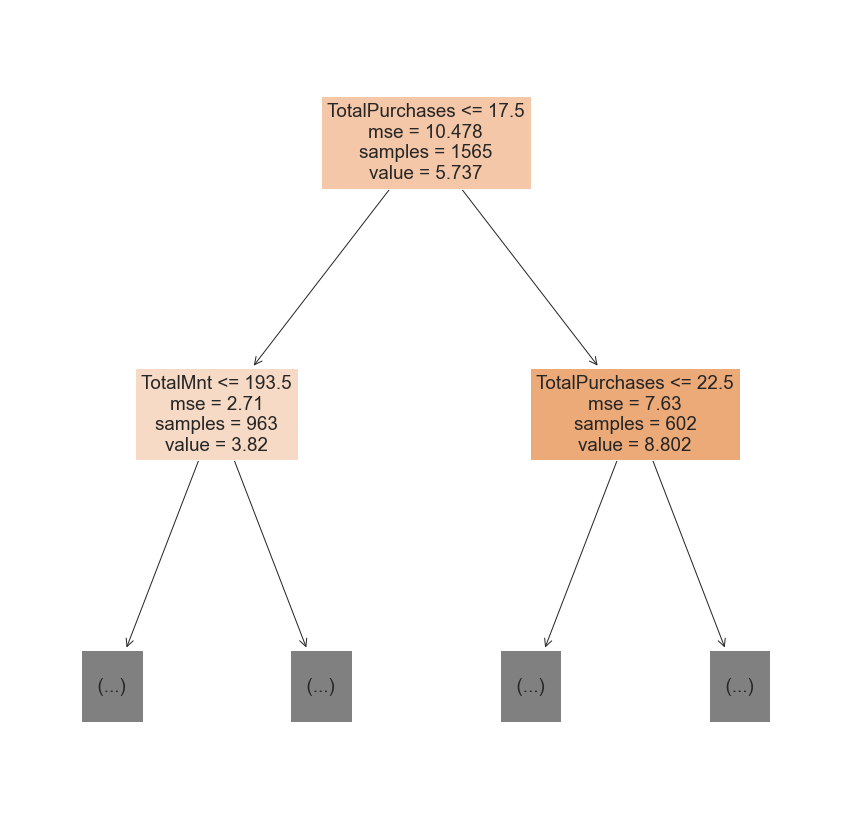

In [31]:
# Visualize the decision tree regression
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(dtReg_model,
              feature_names = list(X_train.columns),
              filled = True,
              max_depth = 1);

The depth of the tree was limited to 1 for the purpose of illustration as it would be difficult to view the details with the full length.

The root node (with all 1565 samples or observations) can be interpreted as asking the question, "Is the TotalPurchases or less 17.5?" If so, branch to the left else branch to the right. The fact that the TotalPurchases variable was used as a first split, indicates that it is the most important variable in the dataset in predicting the number of store purchases ("NumStorePurchases").

The mse value 10.478 shows the degree of impurity or variability in a partition. The smaller the mse value is, the closer the values are to the mean. This value decreases as the tree branches further. 

The value 5.737 is the mean of the values in a partition. This is the predicted value of the regression tree.

The right branch considers if TotalPurchases is 22.5 or less. If ture, it branches to the left else it branches to the right. The left branch considers if the total spending "TotalMnt" is 193.5 or less. If true, it branches to the left else it branches to the right. 

The decision tree helps in ranking the effectiveness of independent variables in predicting the values of the dependent variable. This is the feature importance.

In [32]:
# get feature importance
f_importance = dtReg_model.feature_importances_
print(f_importance)

[1.46571936e-04 0.00000000e+00 1.95151255e-04 1.37215726e-04
 4.10298982e-03 0.00000000e+00 0.00000000e+00 1.32859671e-04
 4.69582708e-04 8.00425070e-04 1.83959545e-03 6.73253893e-04
 0.00000000e+00 1.23216950e-04 1.78598247e-04 3.75225720e-04
 1.20125471e-03 0.00000000e+00 8.65612623e-04 4.61451405e-04
 2.35754966e-04 2.17103332e-03 6.84382292e-03 1.17113340e-04
 3.56599627e-03 4.77161547e-03 5.46698871e-02 1.38053057e-03
 4.38457039e-03 5.14836428e-03 7.67763538e-03 1.02971099e-02
 8.63253021e-03 3.36758449e-02 5.84678329e-02 3.12810070e-02
 7.61900802e-04 1.23201550e-04 7.62309590e-05 4.06565115e-05
 5.48862905e-05 1.93118430e-04 0.00000000e+00 3.49441143e-03
 1.69968137e-03 1.09728843e-01 6.38308080e-01 4.95336232e-04]


Text(0, 0.5, 'Importance')

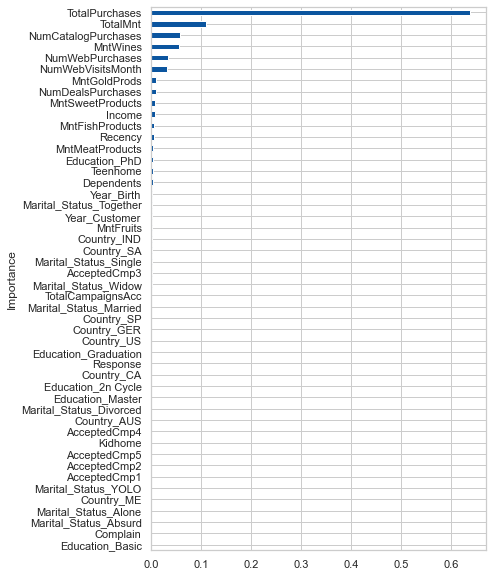

In [33]:
# connect importance to feature names and visualize
feat_importance = pd.Series(f_importance, index = X_train.columns)
feat_importance.sort_values().plot(kind = "barh", figsize=(6,10))
plt.ylabel("Importance")



The plot shows that the total number of store purchases "TotalPurchases" variable is the most important in predicting the number of store purchases (**NumStorePurchases**) while the education_basic variable is the least important.

The features that impact the number of store purchases include:
1. The number of total purchases by customers "TotalPurchases"
2. The Total spending capacity of customers "TotalMnt"
3. Number of catalog purchases
4. Number of website purchases
5. Number of website vistors in the past month

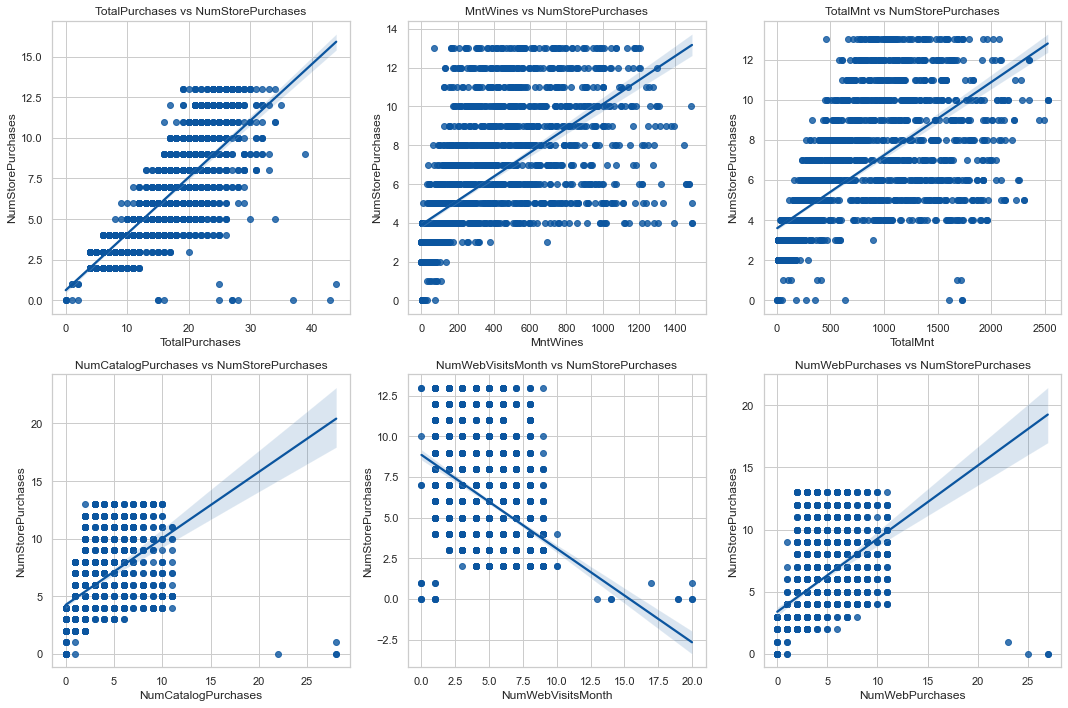

In [34]:
# to visualize the significant factors mentioned
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(15,10))

# Plot 1
sns.regplot(x = "TotalPurchases", y = "NumStorePurchases", data = md, 
           ax = axes[0, 0])
axes[0, 0].set_title("TotalPurchases vs NumStorePurchases")

# Plot 2
sns.regplot(x = "MntWines", y = "NumStorePurchases", data = md, 
           ax = axes[0, 1])
axes[0, 1].set_title("MntWines vs NumStorePurchases")

# Plot 3
sns.regplot(x = "TotalMnt", y = "NumStorePurchases", data = md, 
           ax = axes[0, 2])
axes[0, 2].set_title("TotalMnt vs NumStorePurchases")


# Plot 4
sns.regplot(x = "NumCatalogPurchases", y = "NumStorePurchases", data = md, 
           ax = axes[1, 0])
axes[1, 0].set_title("NumCatalogPurchases vs NumStorePurchases")


# Plot 5
sns.regplot(x = "NumWebVisitsMonth", y = "NumStorePurchases", data = md, 
           ax = axes[1, 1])
axes[1, 1].set_title("NumWebVisitsMonth vs NumStorePurchases")


# Plot 6
sns.regplot(x = "NumWebPurchases", y = "NumStorePurchases", data = md, 
           ax = axes[1, 2])
axes[1, 2].set_title("NumWebPurchases vs NumStorePurchases")

# Set spacing between subplots
plt.tight_layout()

# show plot
plt.show()

In [35]:
# check model performance on training data
dtReg_model.score(X_train, y_train)

1.0

The model is able to able explain 100% of the variability in the training data.

In [36]:
# check model performance on the test data
dtReg_model.score(X_test, y_test)

0.8384274289334073

The model is able to able explain 83% of the variability in the test data which is not poor and there is room for the model to be better.

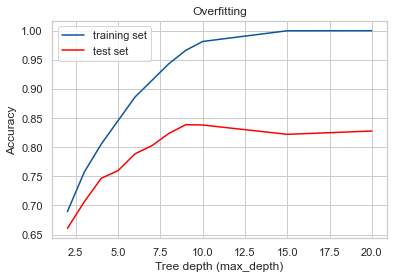

In [37]:
# plot accuracy as a function of max_depth
max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20]
accuracytrain_list=[]
accuracytest_list=[]
for i in range(0,len(max_depth_vals)):
    decision_tree_reg = tree.DecisionTreeRegressor(max_depth=max_depth_vals[i], random_state=i)
    decision_tree_reg.fit(X_train,y_train)
    # Training set
    ytrain_pred = decision_tree_reg.predict(X_train)
    accuracy_train = metrics.r2_score(y_train, ytrain_pred)
    accuracytrain_list.append(accuracy_train)
    # Test set
    ytest_pred = decision_tree_reg.predict(X_test)
    accuracy_test = metrics.r2_score(y_test, ytest_pred)
    accuracytest_list.append(accuracy_test)

# Plot accuracy as a function of max_depth
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
line1, = ax.plot(max_depth_vals,accuracytrain_list,label='training set')
line2, = ax.plot(max_depth_vals,accuracytest_list,label='test set',color='red')
plt.legend(handles=[line1, line2])
plt.title("Overfitting")
plt.xlabel("Tree depth (max_depth)")
plt.ylabel("Accuracy")
plt.show()

The accuracy of the training set predictions increases by increasing the max_depth. But it is observed that for depths greater than 10, the accuracy on the test set begins to drop as the tree "overfits" to the training set.

## Accuracy using k-fold cross-validation

In [38]:
# Use 5-fold cross-validation to compute the mean accuracy at a tree depth of 10
from sklearn.model_selection import cross_val_score
maxDepth = 10
k=5
decision_tree_reg = tree.DecisionTreeRegressor(max_depth=maxDepth, random_state=2)
cv_scores = cross_val_score(decision_tree_reg, X, y, cv=k)
print('Cross-validation scores are:',cv_scores)

# Compute the average of the accuracies and its error
import math
avg = sum(cv_scores)/len(cv_scores)
sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
print('Average performance for a tree depth of',maxDepth,'is:',np.round(avg*100,1),'+/-',np.round(sd*100,1),'%')

Cross-validation scores are: [0.78883929 0.8083175  0.80468642 0.82226155 0.80114326]
Average performance for a tree depth of 10 is: 80.5 +/- 1.2 %


## Random Forest Regression

The overfitting tendencies of the individual decision trees are high, especially if they branch too deep. Random Forests allow trees to be grown deeper. Random Forest Regressor (RFR) relies on the "average prediction values" of the individual decision trees. RFR is slightly different from the Random Forest Classifier (RFC) that relies on "majority vote" of the class labels among all the decision trees to predict the target variable (tv) which is categorical or represents class labels. Both RFR & RFC are less exposed to the pecualiarities of the training set. A Random Forest Regressoion was implemented below due to the numeric nature of the target variable "NumStorePurchases".

In [43]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, bootstrap=True,
                                   max_features='auto', criterion='mse',
                                   max_depth=None, random_state=3,
                                   oob_score=True)
forest_reg.fit(X_train,y_train)

# get prediction and check accuracy on training set using r2_score metric
y_train_pred = forest_reg.predict(X_train)
print("Accuracy on training set:",round(metrics.r2_score(y_train, y_train_pred),2))

# get prediction and check accuracy on test set using r2_score metric 
y_test_pred = forest_reg.predict(X_test)
print("Accuracy on test set:",round(metrics.r2_score(y_test, y_test_pred),2))
print("OOB score:",round(forest_reg.oob_score_,2)) # Alternative to test set validation method 

Accuracy on training set: 0.99
Accuracy on test set: 0.9
OOB score: 0.9


In [44]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

1.1012575892857144

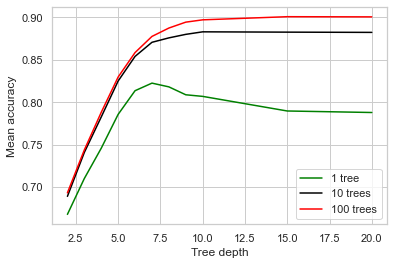

In [41]:
'''Plot the mesn performance of the Random Forest algorithm as a function
of tree depth using different number of trees'''

from sklearn.model_selection import cross_val_score
import math
from sklearn.ensemble import RandomForestRegressor
max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20]
n_estimators_vals = [10,100]
mean_accuracy_store = []
sd_accuracy_store = []
k=5
for i, value in enumerate(n_estimators_vals):
    mean_accuracy_cv = []
    sd_cv = []
    for val in max_depth_vals:
        forest_reg = RandomForestRegressor(n_estimators=value, bootstrap=True,
                                           max_features="auto", criterion='mse',
                                           max_depth=val, random_state=i,
                                           oob_score=False)
        cv_scores = cross_val_score(forest_reg, X, y, cv=k)
        avg = sum(cv_scores)/len(cv_scores)
        sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
        mean_accuracy_cv.append(avg)
        sd_cv.append(sd)
    mean_accuracy_store.append(mean_accuracy_cv)
    sd_accuracy_store.append(sd_cv)

fig = plt.figure()
ax = plt.axes()
line2, = ax.plot(max_depth_vals,mean_accuracy_store[0],color='black',label='10 trees')
line3, = ax.plot(max_depth_vals,mean_accuracy_store[1],color='red',label='100 trees')

#find accuracy scores as a function of tree depth for a single decision tree
mean_accuracy_cv = []
for i in range(0,len(max_depth_vals)):
    decision_tree_reg = tree.DecisionTreeRegressor(max_depth=max_depth_vals[i], random_state=3)
    cv_scores = cross_val_score(decision_tree_reg, X, y, cv=k)
    avg = sum(cv_scores)/len(cv_scores)
    mean_accuracy_cv.append(avg)
    
line1, = ax.plot(max_depth_vals,mean_accuracy_cv,color='green',label='1 tree')


plt.legend(handles=[line1, line2, line3])
plt.xlabel("Tree depth")
plt.ylabel("Mean accuracy")
plt.show()

Text(0, 0.5, 'Importance')

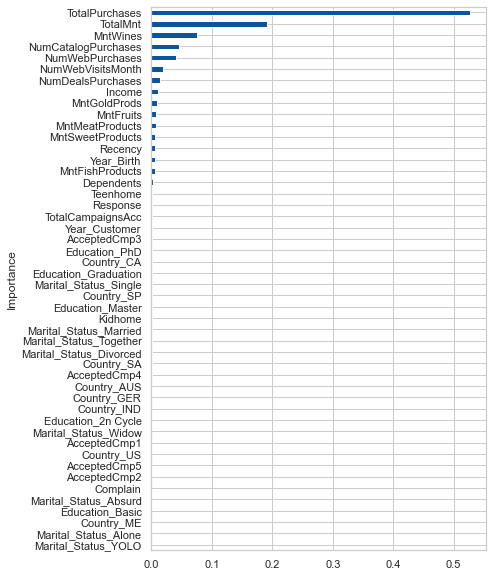

In [45]:
feature_cols = X_train.columns
feat_importances = forest_reg.feature_importances_
forest_reg_feat = pd.Series(feat_importances, feature_cols)
forest_reg_feat.sort_values().plot(kind = "barh", figsize=(6,10))
plt.ylabel("Importance")

In [46]:
# print the performance scores from the decision tree and random forest algorithm
# get predicted NumStorePurchases from test dataset (decision tree)
y_predict_dtr = dtReg.predict((X_test))

# Evaluate model using R-Square for Decision Tree Regression
dt_r_square = metrics.r2_score(y_test, y_predict_dtr)
print("R-Square value associated with Decision Tree Regression is:", dt_r_square)

# get predicted NumStorePurchases from test dataset (random forest)
y_test_pred = forest_reg.predict(X_test)

# Evaluate model using R-Square for Randonm Regression (rfr)
rfr_r_square = metrics.r2_score(y_test, y_test_pred)
print("R-Square value associated with Random Forest Regression is:", rfr_r_square)

R-Square value associated with Decision Tree Regression is: 0.8384274289334073
R-Square value associated with Random Forest Regression is: 0.8974519815503998


Further analysis is done on the data to discover more patterns and insights for recommendations that can help improve the results future marketing campaigns.
The amount of purchases and amount spent by each country was visualized.

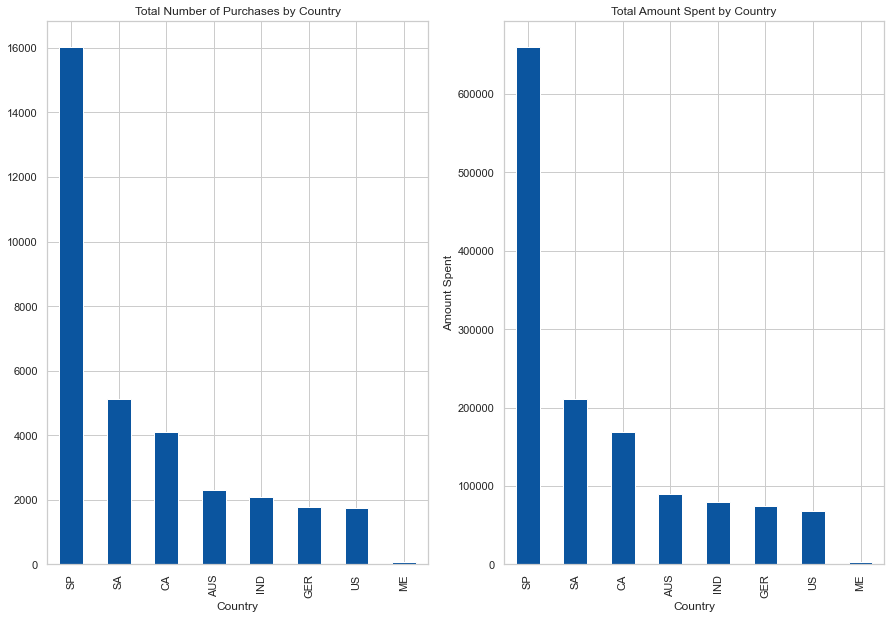

In [47]:
'''plot the number of purchases per country and 
see if the US has better purchasing capacity than other target countries'''

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,10))

# Plot 1
md.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(
    kind = "bar", ax = axes[0])
plt.ylabel("Number of Purchases")
axes[0].set_title("Total Number of Purchases by Country")

# Plot 2
md.groupby('Country')['TotalMnt'].sum().sort_values(ascending=False).plot(
    kind = "bar", ax = axes[1])
plt.ylabel("Amount Spent")
axes[1].set_title("Total Amount Spent by Country")

plt.savefig("C:/Users/USER/Desktop/UoE/MA336- AI/Final Project/country_PnS.png")

The success rate of the different campaigns are visualized below.

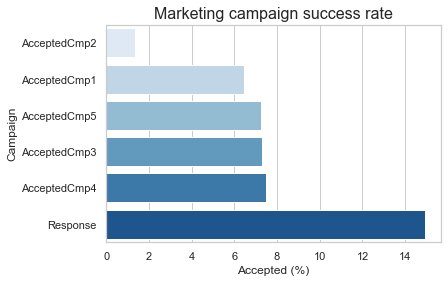

In [48]:
# compute success rate of the campaigns
c_success = pd.DataFrame(md[["AcceptedCmp1", "AcceptedCmp2",
                             "AcceptedCmp3", "AcceptedCmp4",
                             "AcceptedCmp5","Response"]].mean()*100,
                        columns=["Percent"]).reset_index()

# visualize on a plot
sns.barplot(x = "Percent", y = "index", 
            data = c_success.sort_values("Percent"), palette = "Blues")
plt.xlabel("Accepted (%)")
plt.ylabel("Campaign")
plt.title("Marketing campaign success rate", size= 16);

plt.savefig("C:/Users/USER/Desktop/UoE/MA336- AI/Final Project/Campaign_S.png")

The most recent campaign "Response" achieved the more success than the other campaigns.

The demography of the average customer of the brand was computed and visualized.

In [49]:
# compute columns with binary values
b_cols = [col for col in md.columns if "Accepted" in col] + ["Response", "Complain"]

# spending columns
mnt_cols = [col for col in md.columns if "Mnt" in col]

# channels columns
chan_cols = [col for col in md.columns if "Num" in col] + ["TotalPurchases", "TotalCampaignsAcc"]

In [50]:
# demographics of average customers
customer_dem = pd.DataFrame(
    round(md.drop(columns = b_cols + mnt_cols + chan_cols).mean(), 1),
columns = ["Average"]).reindex(["Year_Birth", "Year_Customer",
                               "Income", "Dependents", "Kidhome", 
                               "Teenhome", "Recency"])

customer_dem

,Average
Year_Birth,1968.9
Year_Customer,2013.0
Income,52227.4
Dependents,1.0
Kidhome,0.4
Teenhome,0.5
Recency,49.1


The average customer demographics from the analysis showed the following:
- Born in 1969
- Became a customer in 2013
- Has an income of \$52,000 per year
- Has one dependent which are almost split equally between kids or teens
- made a purchase from the company in the last 49 days

Analysis was done to know the performance of the products.

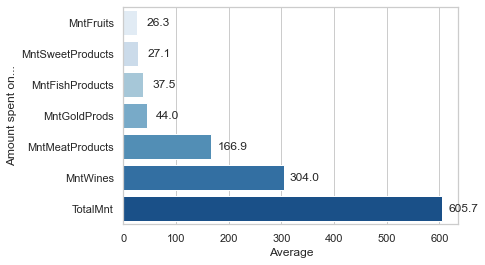

In [51]:
amount = pd.DataFrame(round(md[mnt_cols].mean(), 1),
                     columns= ["Average"]).sort_values(by= "Average").reset_index()

# visualize plot
ax = sns.barplot(x = "Average", y="index", data= amount, palette = "Blues")
plt.ylabel("Amount spent on...")

# label bars with corresponding values
for p, q in zip(ax.patches, amount["Average"]):
    ax.text(x = q+40,
           y= p.get_y()+0.5,
           s= q,
           ha= "center");

The best performing products include wines and meat.

# 3. Results

The correlation matrix of the features in the analysis showed that the total purchases and total amount spent are related to customers with high income levels.

The most important feature in the model to explain variations in the target variable "NumStorePurchases" is the Total purchases. This is followed by the Total amount spent and number of catalog purchases.

Spain has the highest number of purchases  and amount spent while the US is the second to the last. So, the US does not do better than the other target countries. 

The most recent campaign "Response" is the most successful among the campaigns.

The Random Forest Regression (RFR) algorithm produced a better model with R-Square value of 0.89 compared to the model from the Decision Tree Regression (DTR) algorithm with R-Square value of 0.84.

# 4. Conclusion 

The analysis has shown that the Random Forest algorithm gives a better model compared to the Decision Tree algorithm. The insights from the analysis showed that the most recent marketing campaign "Response" has generated the highest results so far. More budget can be allocated to the same campaign set up while experimenting or testing different campaign set ups for more results. More adults with the defined demography should be targeted. 

The highest purchases and spending capacity came from Spain. So, more campaigns can be tailored to audience in Spain. Most customers spent more on the wine and meat products. These products can be promoted more with special offers and deals to boost overall purchases. The other brand products and components of the marketing campaigns can be improved upon. However, it is important to focus more on what is working to reach more customers and boost revenue for the brand.  

# References

Source of Data [("marketing_data.csv")](https://www.kaggle.com/code/jennifercrockett/marketing-analytics-eda-task-final/input)-  
https://www.kaggle.com/code/jennifercrockett/marketing-analytics-eda-task-final/input

Data anlaysis source: [Marketing Analytics by Jennifer Crockett on Kaggle](https://www.kaggle.com/code/jennifercrockett/marketing-analytics-eda-task-final/notebook) 
https://www.kaggle.com/code/jennifercrockett/marketing-analytics-eda-task-final/notebook